# Movie Data Analysis 
## By: Liliana Emfinger

<img src="theater-sign-movie-premiere-vector.jpg" alt="Movie-premiere-clip" style="width: 900px;height: 550px;"/>

# Overview
Microsoft is a multinational tech company. They produce everything from software to computers, to games and gaming consoles. Now Microsoft wants to take a new venture and break into the Movie industry! This project analyzes data from IMBD and The-Numbers.com. Microsoft can use this analysis to enter and be competitive in the movie industry worldwide.The analysis of this data shows that Microsoft can enter and succeed in the movie industry if they enter the market with an Adventure Animation movie that runs for about 125 minutes with a production budget of 175,000,000.
 



<img src="Movie-art-clip.jpg" alt="Movie-art-clip" style="width: 900px;height: 400px;"/>

# Business Problem
Microsoft would like to enter the movie industry and be competitive with other veteran studios. In order to enter competitively Microsoft would like to make their movie a success. Analyzing Data from movies, we can find what profitable actions microsoft can take to enter this industry and be successful! 

# Data Understanding 
(data explanation, exploration, and cleaning)


#### The Data used: 
- The-Numbers.com Data
- IMBD Data

IMBD data has multiple tables attached and related to each other. The tables in the IMBD Data are movie_basics, directors, known_for, movie_akas, movie_ratings, persons, principals, and writers.
The tables used in this analysis are movie basics, movie ratings and The-Numbers.com which was re-named to movie_budgets. Movie_budgets(The-Numbers.com) contains movie titles their release dates budgets and gross for each movie. Movie_basics contains movies released from 2010-2019. Movie_basics columns are movie id, primary title, original title, start year, runtime of the movie, genres for each movie . Movie_ratings contains a movie id, average rating (weighted average of all the individual user ratings, ratings are measured 1-10) and number of votes each movie received. The movie rating metric is out of 10.


Metrics for success of a movie are ROI and ratings.
- ROI = Net Return on Investment- was calculated by taking worldwide gross subtracting production budget thus getting the return on investment. Net ROI was chosen as a metric for success because businesses (especially multinational) are about making a profit.
- Ratings = are a weighted average of all the individual user ratings. Ratings are measured 1-10. Ratings was chosen as a measure of success because people will pay to watch movies that they like, thus bring more popularity to the movie and ultimately more profit over time.


GOAL: is to use the data to find
1. The average ratings per Genre
2. The average and total ROI per Genre 
3. Top 50 movies with the highest ROI vs Runtime




In [1]:
import pandas as pd
import seaborn as sns
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
#unzips the SQL data
! unzip -n zippedData/im.db.zip

Archive:  zippedData/im.db.zip


### IMBD Data

In [3]:
#IMBD data
conn = sqlite3.connect("im.db")

In [4]:
#grabbing all of the table names from the im.bd data

cur = conn.cursor()
cur.execute('''SELECT  name FROM sqlite_master WHERE type ='table' ;''')

table_names = cur.fetchall()
table_names

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

#### Movie_basics Data

In [5]:
#open up movie basics and look at some info from this table
movie_basics = pd.read_sql("SELECT * FROM movie_basics;", conn)
movie_basics.info()

#sample of the data
movie_basics.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


#### Movie_ratings Data

In [6]:
#open up movie ratings and look at some info from this table
movie_ratings = pd.read_sql("SELECT * FROM movie_ratings;", conn)
movie_ratings.info()

#sample of the data
movie_ratings.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


### Movie_budgets data from The-Numbers.com

In [7]:
#open up movie_budgets and look at some info from this table
movie_budgets = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")
movie_budgets.info()

#Sample of the data
movie_budgets.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


# Data Preperation 

#### Re-Checking column types

In [8]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


#### Remove characters "$" and ',' to be able to turn comlumn into a INT (number)
I have to remove these charcters so that the colomn values can be turned into the number type

In [9]:
movie_budgets["production_budget"] = movie_budgets["production_budget"].str.replace("$","", regex=True)
movie_budgets["production_budget"] = movie_budgets["production_budget"].str.replace(",","", regex=True)
movie_budgets["worldwide_gross"] = movie_budgets["worldwide_gross"].str.replace("$","", regex=True)
movie_budgets["worldwide_gross"] = movie_budgets["worldwide_gross"].str.replace(",","", regex=True)
movie_budgets["domestic_gross"] = movie_budgets["domestic_gross"].str.replace("$","", regex=True)
movie_budgets["domestic_gross"] = movie_budgets["domestic_gross"].str.replace(",","", regex=True)

#### Turn column into numuric column and check if it worked

In [10]:
movie_budgets["worldwide_gross"] = movie_budgets["worldwide_gross"].apply(pd.to_numeric)
movie_budgets["production_budget"] = movie_budgets["production_budget"].apply(pd.to_numeric)
movie_budgets["domestic_gross"] = movie_budgets["domestic_gross"].apply(pd.to_numeric)
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


#### Engineer a new feature to calculate ROI

In [11]:
#take worldwide gross and subtract production budget to calculate ROI
movie_budgets["ROI"] = movie_budgets["worldwide_gross"] - movie_budgets["production_budget"]
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0,-7000
5778,79,"Apr 2, 1999",Following,6000,48482,240495,234495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-3662
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,-1400


#### Adding commas so that the data looks cleaner

In [12]:
movie_budgets["ROI"] = movie_budgets.apply(lambda x: "{:,}".format(x["ROI"]), axis=1)
movie_budgets["worldwide_gross"] = movie_budgets.apply(lambda x: "{:,}".format(x["worldwide_gross"]), axis=1)
movie_budgets["production_budget"] = movie_budgets.apply(lambda x: "{:,}".format(x["production_budget"]), axis=1)
movie_budgets["domestic_gross"]= movie_budgets.apply(lambda x: "{:,}".format(x["domestic_gross"]), axis=1)

In [13]:
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI
0,1,"Dec 18, 2009",Avatar,"425,000,000","760,507,625","2,776,345,279","2,351,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"410,600,000","241,063,875","1,045,663,875","635,063,875"
2,3,"Jun 7, 2019",Dark Phoenix,"350,000,000","42,762,350","149,762,350","-200,237,650"
3,4,"May 1, 2015",Avengers: Age of Ultron,"330,600,000","459,005,868","1,403,013,963","1,072,413,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"317,000,000","620,181,382","1,316,721,747","999,721,747"


### Movie_basics data

#### Merging Movie_ratings and movie_basics and appying .explode
This merge is done so that the movie ratings and genres are together 

In [14]:
basic_ratings = pd.merge(movie_ratings, movie_basics, on=['movie_id'], how='outer')
basic_ratings['genre_list'] = basic_ratings['genres'].str.split(',')
genre_ratings = basic_ratings.explode('genre_list')

genre_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234958 entries, 0 to 146143
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         234958 non-null  object 
 1   averagerating    129294 non-null  float64
 2   numvotes         129294 non-null  float64
 3   primary_title    234958 non-null  object 
 4   original_title   234937 non-null  object 
 5   start_year       234958 non-null  int64  
 6   runtime_minutes  195904 non-null  float64
 7   genres           229550 non-null  object 
 8   genre_list       229550 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 17.9+ MB


#### Dropping null data
I'm looking to use this table to get the average rating per genre so I need to drop every movie that does not have a rating or a genre connected to it. 

In [15]:
genre_ratings = genre_ratings.dropna()
genre_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118437 entries, 0 to 73855
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         118437 non-null  object 
 1   averagerating    118437 non-null  float64
 2   numvotes         118437 non-null  float64
 3   primary_title    118437 non-null  object 
 4   original_title   118437 non-null  object 
 5   start_year       118437 non-null  int64  
 6   runtime_minutes  118437 non-null  float64
 7   genres           118437 non-null  object 
 8   genre_list       118437 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 9.0+ MB


#### Cleaning data columns and generating value counts

In [16]:
genre_ratings.columns = genre_ratings.columns.str.replace(' ', '')
genre_ratings.columns = genre_ratings.columns.str.strip()
genre_ratings['genre_list'].value_counts()

Drama          28394
Documentary    16423
Comedy         15514
Thriller        7583
Horror          6917
Action          6297
Romance         5976
Crime           4338
Biography       3693
Adventure       3621
Family          3231
Mystery         2889
History         2704
Sci-Fi          2048
Fantasy         1969
Music           1844
Animation       1615
Sport           1099
War              795
Musical          638
News             575
Western          256
Reality-TV        13
Adult              2
Game-Show          2
Short              1
Name: genre_list, dtype: int64

#### Droping invalid data

In [17]:
#Checking number of rows
genre_ratings.shape

(118437, 9)

In [18]:
#drop the rows that have reality-tv, short, game-show, and adult
#technically News, reality-tv, shorts, and game-shows don't count as movies
#also since the adult industry is another industry on its own and theres so few in our data we will drop it
genre_ratings = genre_ratings[genre_ratings['genre_list'].str.contains("Reality-TV")== False]
genre_ratings = genre_ratings[genre_ratings['genre_list'].str.contains("Short")== False]
genre_ratings = genre_ratings[genre_ratings['genre_list'].str.contains("Game-Show")== False]
genre_ratings = genre_ratings[genre_ratings['genre_list'].str.contains("Adult")== False]
genre_ratings = genre_ratings[genre_ratings['genre_list'].str.contains("News")== False]

In [19]:
#Checking number of rows again to make sure code worked
genre_ratings.shape

(117844, 9)

In [20]:
#Checking to see which columns were dropped
genre_ratings['genre_list'].value_counts()

Drama          28394
Documentary    16423
Comedy         15514
Thriller        7583
Horror          6917
Action          6297
Romance         5976
Crime           4338
Biography       3693
Adventure       3621
Family          3231
Mystery         2889
History         2704
Sci-Fi          2048
Fantasy         1969
Music           1844
Animation       1615
Sport           1099
War              795
Musical          638
Western          256
Name: genre_list, dtype: int64

### Creating Genre_ROI table
Creating this table to gather Genre and ROI data 
#### renaming a column for a smooth merge

In [21]:
genre_ratings.rename(columns = {'primary_title':'movie'}, inplace = True)
genre_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117844 entries, 0 to 73855
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         117844 non-null  object 
 1   averagerating    117844 non-null  float64
 2   numvotes         117844 non-null  float64
 3   movie            117844 non-null  object 
 4   original_title   117844 non-null  object 
 5   start_year       117844 non-null  int64  
 6   runtime_minutes  117844 non-null  float64
 7   genres           117844 non-null  object 
 8   genre_list       117844 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 9.0+ MB


#### Merging movie_budgets and genre_ratings

In [22]:
genre_roi = pd.merge(movie_budgets, genre_ratings, on=['movie'], how='outer')

genre_roi.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,movie_id,averagerating,numvotes,original_title,start_year,runtime_minutes,genres,genre_list
0,1.0,"Dec 18, 2009",Avatar,"425,000,000","760,507,625","2,776,345,279","2,351,345,279",tt1775309,6.1,43.0,Abatâ,2011.0,93.0,Horror,Horror
1,2.0,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"410,600,000","241,063,875","1,045,663,875","635,063,875",tt1298650,6.6,447624.0,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",Action
2,2.0,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"410,600,000","241,063,875","1,045,663,875","635,063,875",tt1298650,6.6,447624.0,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",Adventure
3,2.0,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"410,600,000","241,063,875","1,045,663,875","635,063,875",tt1298650,6.6,447624.0,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",Fantasy
4,3.0,"Jun 7, 2019",Dark Phoenix,"350,000,000","42,762,350","149,762,350","-200,237,650",tt6565702,6.0,24451.0,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi",Action


### Data cleaning 

#### Checking data types

In [23]:
genre_roi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121722 entries, 0 to 121721
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 9922 non-null    float64
 1   release_date       9922 non-null    object 
 2   movie              121722 non-null  object 
 3   production_budget  9922 non-null    object 
 4   domestic_gross     9922 non-null    object 
 5   worldwide_gross    9922 non-null    object 
 6   ROI                9922 non-null    object 
 7   movie_id           118090 non-null  object 
 8   averagerating      118090 non-null  float64
 9   numvotes           118090 non-null  float64
 10  original_title     118090 non-null  object 
 11  start_year         118090 non-null  float64
 12  runtime_minutes    118090 non-null  float64
 13  genres             118090 non-null  object 
 14  genre_list         118090 non-null  object 
dtypes: float64(5), object(10)
memory usage: 14.9+ MB


#### Removing commas and making ROI a numeric type

In [24]:
genre_roi["ROI"] = genre_roi["ROI"].str.replace(",","", regex=True)
genre_roi["ROI"] = genre_roi["ROI"].apply(pd.to_numeric)

In [25]:
genre_roi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121722 entries, 0 to 121721
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 9922 non-null    float64
 1   release_date       9922 non-null    object 
 2   movie              121722 non-null  object 
 3   production_budget  9922 non-null    object 
 4   domestic_gross     9922 non-null    object 
 5   worldwide_gross    9922 non-null    object 
 6   ROI                9922 non-null    float64
 7   movie_id           118090 non-null  object 
 8   averagerating      118090 non-null  float64
 9   numvotes           118090 non-null  float64
 10  original_title     118090 non-null  object 
 11  start_year         118090 non-null  float64
 12  runtime_minutes    118090 non-null  float64
 13  genres             118090 non-null  object 
 14  genre_list         118090 non-null  object 
dtypes: float64(6), object(9)
memory usage: 14.9+ MB


In [26]:
genre_roi.columns = genre_roi.columns.str.strip()

#### Dropping data that does not give us genre AND return on investment (ROI) 

In [27]:
genre_roi = genre_roi.dropna()
genre_roi.drop([0],axis=0, inplace = True)
genre_roi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6289 entries, 1 to 9920
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 6289 non-null   float64
 1   release_date       6289 non-null   object 
 2   movie              6289 non-null   object 
 3   production_budget  6289 non-null   object 
 4   domestic_gross     6289 non-null   object 
 5   worldwide_gross    6289 non-null   object 
 6   ROI                6289 non-null   float64
 7   movie_id           6289 non-null   object 
 8   averagerating      6289 non-null   float64
 9   numvotes           6289 non-null   float64
 10  original_title     6289 non-null   object 
 11  start_year         6289 non-null   float64
 12  runtime_minutes    6289 non-null   float64
 13  genres             6289 non-null   object 
 14  genre_list         6289 non-null   object 
dtypes: float64(6), object(9)
memory usage: 786.1+ KB


In [28]:
#sampling the data
genre_roi.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,movie_id,averagerating,numvotes,original_title,start_year,runtime_minutes,genres,genre_list
1,2.0,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"410,600,000","241,063,875","1,045,663,875",635063875.0,tt1298650,6.6,447624.0,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",Action
2,2.0,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"410,600,000","241,063,875","1,045,663,875",635063875.0,tt1298650,6.6,447624.0,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",Adventure
3,2.0,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"410,600,000","241,063,875","1,045,663,875",635063875.0,tt1298650,6.6,447624.0,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",Fantasy
4,3.0,"Jun 7, 2019",Dark Phoenix,"350,000,000","42,762,350","149,762,350",-200237650.0,tt6565702,6.0,24451.0,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi",Action
5,3.0,"Jun 7, 2019",Dark Phoenix,"350,000,000","42,762,350","149,762,350",-200237650.0,tt6565702,6.0,24451.0,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi",Adventure


# Data Analysis

### Most Common Genres

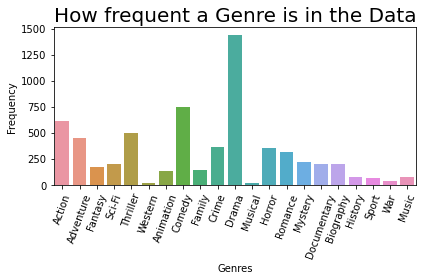

In [29]:
sns.countplot(x='genre_list', data=genre_roi)
plt.xlabel('Genres', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.title('How frequent a Genre is in the Data', fontsize=20)
plt.xticks(rotation=70, fontsize= 10)
plt.tight_layout();

As we can see here in the data that we are analyzing, there seems to be more of the Drama genre but this doesnt really give us anything actionable yet.

### Average Rating Per Genre

In [30]:
avg_rtg = genre_roi.groupby(['genre_list']).mean().reset_index()

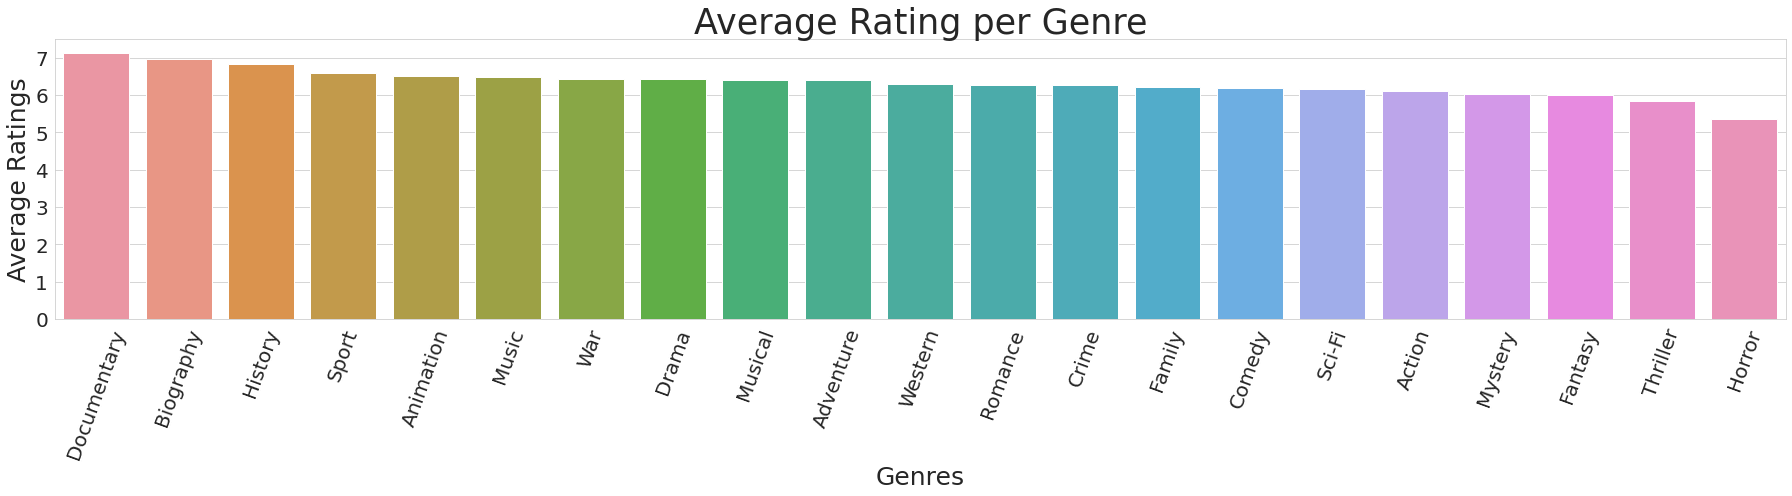

In [31]:
plt.figure(figsize=(25,7))
sns.set_style("whitegrid")

ax= sns.barplot(
    x='genre_list',
    y='averagerating',
    data= avg_rtg.sort_values('averagerating', ascending=False),
)

plt.xlabel('Genres', fontsize=25)
plt.ylabel('Average Ratings', fontsize=25)
plt.title('Average Rating per Genre', fontsize=35)
plt.xticks(rotation=70, fontsize= 20)
plt.yticks(fontsize= 20)
plt.tight_layout();

### TOP 5 HIGHEST RATED GENRES

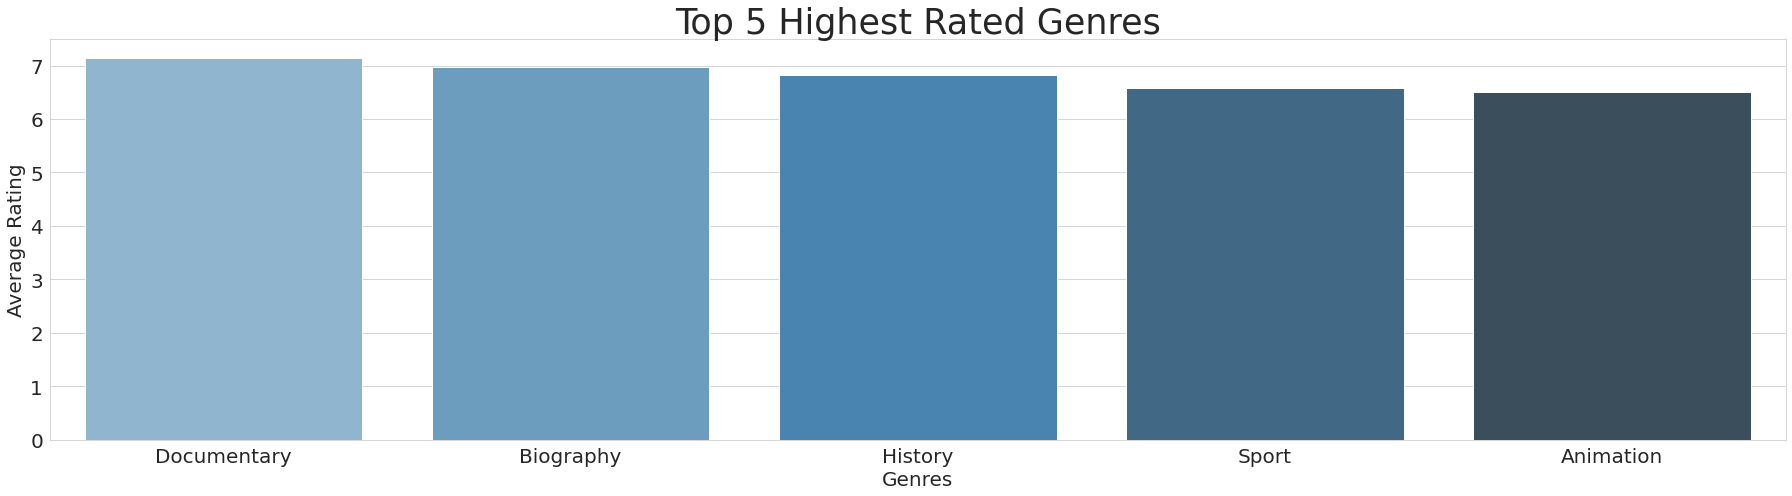

In [32]:
plt.figure(figsize=(25,7))
sns.set_style("whitegrid")

ax = sns.barplot(
    x='genre_list',
    y='averagerating',
    data= avg_rtg.sort_values('averagerating', ascending=False).head(5),
    palette="Blues_d"
)
plt.xlabel('Genres', fontsize=20)
plt.ylabel('Average Rating', fontsize=20)
plt.title('Top 5 Highest Rated Genres', fontsize=35)
plt.xticks( fontsize= 20)
plt.yticks(fontsize= 20)
plt.tight_layout();

With these two figues we can see what genres rated higher than others. The Top 5 are Documentary, Biography, History,Sport and Animation.
- Documentary with an average rating above 7
- Biography with an average rating just below 7 
- History with an average rating almost half way to 7 
- Sport with about a 6.5 rating 
- and Animation with a rating just below a 6.5

### Average Return on Investment per genre

In [33]:
avg_roi_genre = genre_roi.groupby(['genre_list']).mean()

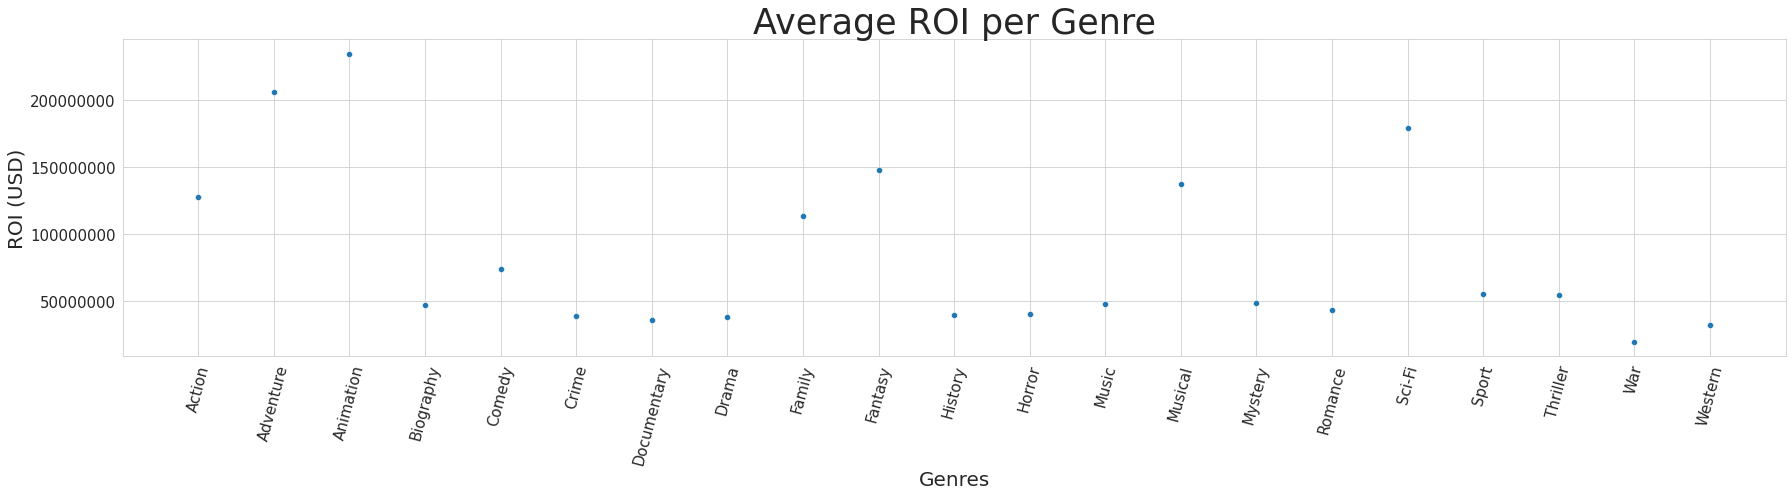

In [34]:
plt.figure(figsize=(25,7))
sns.set_style("whitegrid")


#plot average gross values, with size and hue varying by total values
ax = sns.scatterplot(x="genre_list", y="ROI", data=avg_roi_genre)

#take off the scientific notation on y ticks
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)


#set properties for ticks and labels
plt.xticks(fontsize= 15, rotation = 75)
plt.yticks(fontsize=15)
plt.xlabel('Genres', fontsize=20)
plt.ylabel('ROI (USD)', fontsize=20)
plt.title('Average ROI per Genre', fontsize=35)
plt.tight_layout();

For the Average Return on Investment it looks like the "Animation" genre comes in the highest with well above  the $200,000,000. Second is "Adventure" and third is "Sci-fi" with the highest Returns. 

#### 

### Total ROI per genre

In [35]:
tot_roi_genre = genre_roi.groupby(['genre_list']).sum()

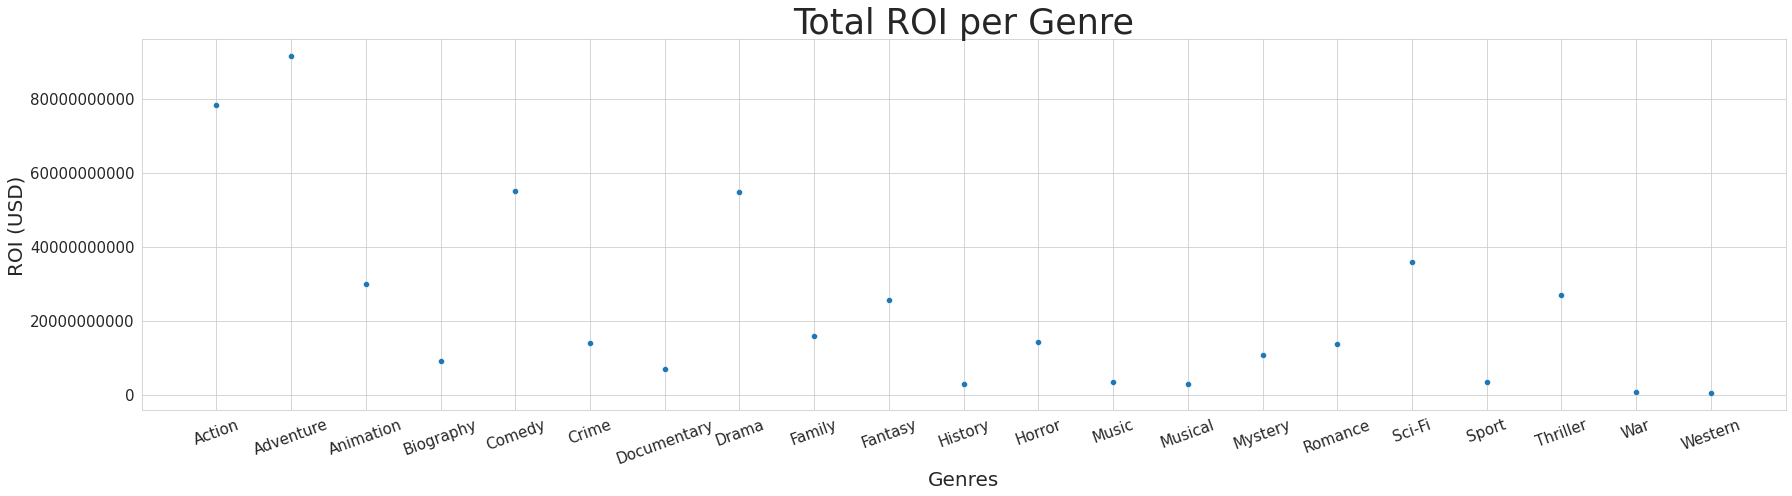

In [36]:
plt.figure(figsize=(25,7))
sns.set_style("whitegrid")

#plot average gross values, with size and hue varying by total values
ax = sns.scatterplot(x="genre_list", y="ROI", data=tot_roi_genre) 

#take off the scientific notation on y ticks
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

#set properties for ticks and labels
plt.xticks(fontsize=15, rotation = 20)
plt.yticks(fontsize=15)
plt.xlabel('Genres', fontsize=20)
plt.ylabel('ROI (USD)', fontsize=20)
plt.title('Total ROI per Genre', fontsize=35)
plt.tight_layout();

Looking at Total Returns on Investment the "Adventure" genre comes in first with the highest making well above the $80,000,000,000 and then second coming in is "Action" alittle bit under that. 

# Production budget and ROI 

In [37]:
genre_roi["production_budget"] = genre_roi["production_budget"].str.replace(",","", regex=True)
genre_roi["production_budget"] = genre_roi["production_budget"].apply(pd.to_numeric)

In [38]:
budget_ROI1 = genre_roi.groupby(['ROI','production_budget']).sum().sort_values('ROI', ascending=False).head(50).reset_index()

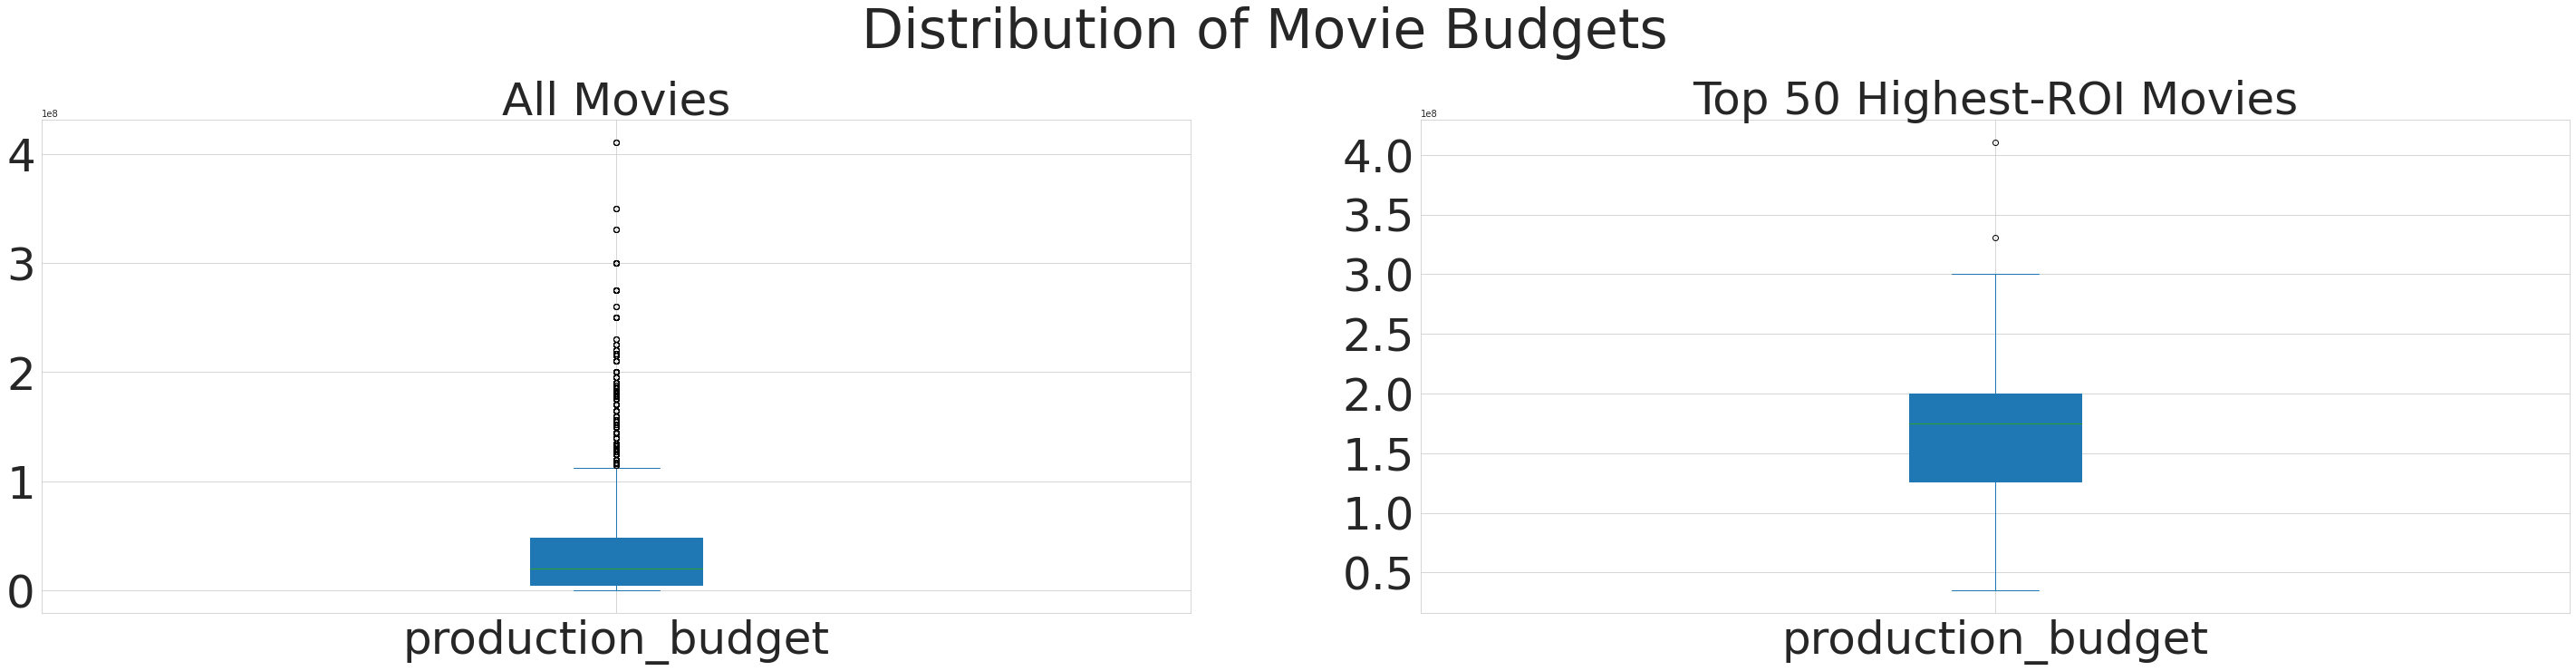

In [39]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(50,10))
plt.figtext(.5,.99, 'Distribution of Movie Budgets', fontsize=60, ha='center')



genre_roi.plot(ax = axes[0],subplots=True, fontsize = 50, kind='box', y= 'production_budget', patch_artist=True) 
budget_ROI1.plot(ax = axes[1],subplots=True, fontsize = 50, kind='box', y= 'production_budget', patch_artist=True)

axes[0].set_title("All Movies", fontsize=50)
axes[1].set_title("Top 50 Highest-ROI Movies", fontsize=50);

Looks like for the top 50 highest ROI movies budgets are anywhere from 125,000,000  to 200,000,000 , with an average of 175,000,000 

## Runtimes and Return on Investment

### Top 100 ROI and runtimes on those movies 

In [40]:
top_50_ROI = genre_roi.groupby(['movie','runtime_minutes']).sum().sort_values('ROI', ascending=False).head(100).reset_index()


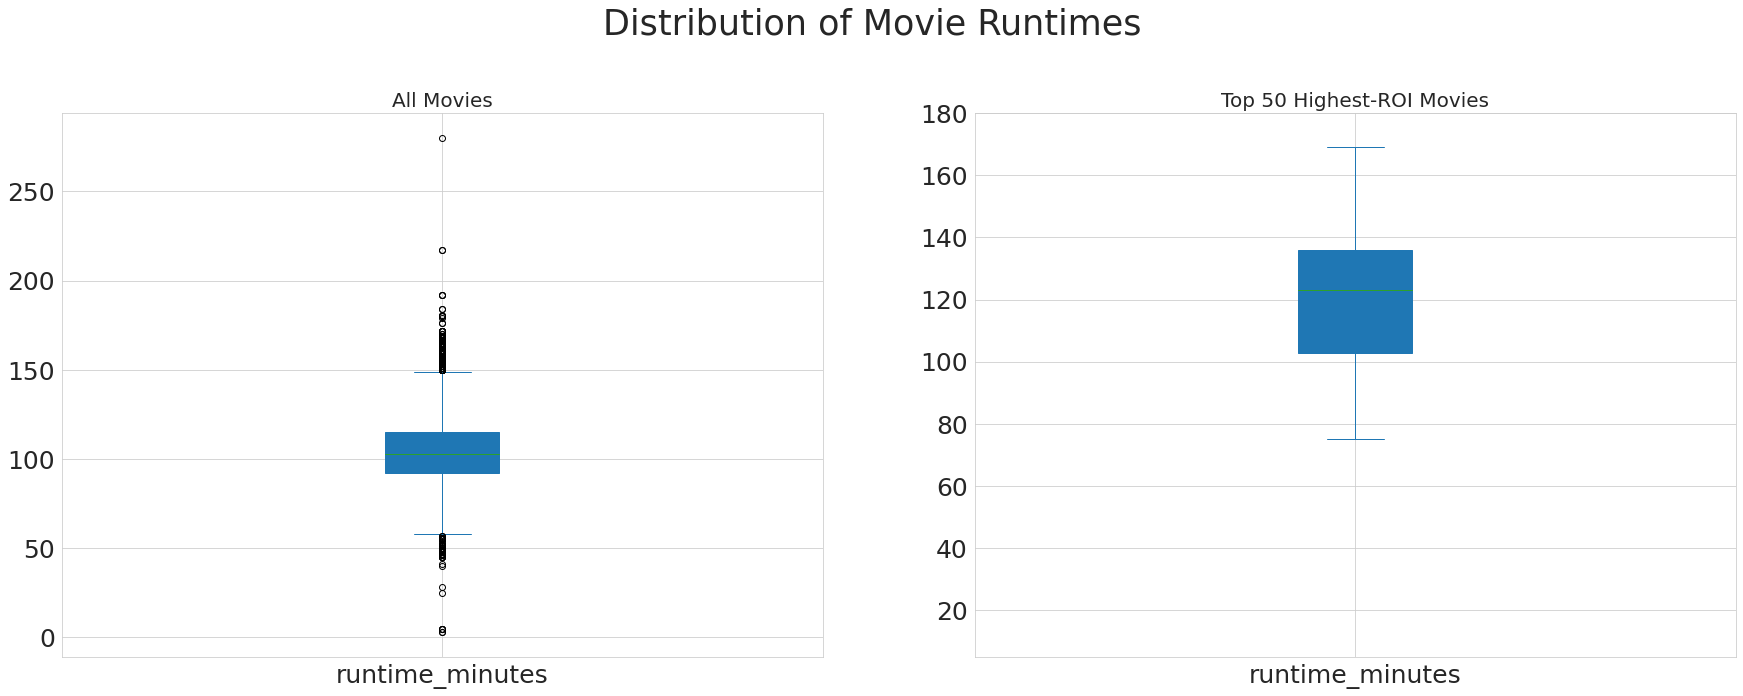

In [41]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(30,10))
plt.figtext(.5,.99, 'Distribution of Movie Runtimes', fontsize=35, ha='center')
plt.ylim(5, 180)


genre_roi.plot(ax = axes[0],subplots=True, fontsize = 25, kind='box', y= 'runtime_minutes', patch_artist=True) 
top_50_ROI.plot(ax = axes[1],subplots=True, fontsize = 25, kind='box', y= 'runtime_minutes', patch_artist=True)

axes[0].set_title("All Movies", fontsize=20)
axes[1].set_title("Top 50 Highest-ROI Movies", fontsize=20);

The first plot is showing that for all movies the average run time is between about 80 minutes to about 110 minutes, with the average being just above 100 minutes. For the top 50 ROI movies, the run times are somewhere between 100 and 140 minutes, with the average being about 125 minutes. 

# Conclusions


What the data is showing is that in terms of average rating per genre the most highly rated genres are Documentary with an average rating above 7, Biography with an average rating just below 7, History with an average rating almost half way to 7, Sport with about a 6.5 rating, and Animation with a rating just below a 6.5. In terms of the average Return on Investment per Genres the "Animation" genre comes in the highest with well above the 200,000,000. Second is "Adventure" and third is "Sci-fi" with the highest Returns. With Total Returns on Investment the "Adventure" genre comes in with the highest making well above the 80,000,000,000 and then second coming in is "Action" alittle bit under that same amount. When it comes to run times on the top 50 highest ROI movies, they're about 100 minutes to 140 minutes with about 125 minutes being the average run-time. As the data shows Animation is in the top 5 rated genres and also has the highest average Return on Investment. In terms of average and total ROI the "Adventure" Genre comes in amongst the top genres. In connection with production budget for the top 50 ROI movies, their average production budget was 175,000,000. With reference to the run times the average run time for a high ROI movie is 125 minutes. 

# Next steps

My recommendation based on highest rating and greatest return on investment is to start off with an Adventure Animation movie that runs for about 125 minutes with a production budget of 175,000,000. Based on the data this will insure that Microsoft enters the industry and is competitive in the market.

In [42]:
conn.close()